<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/16-Boosted-Trees/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdaBoost

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

<Axes: xlabel='class', ylabel='count'>

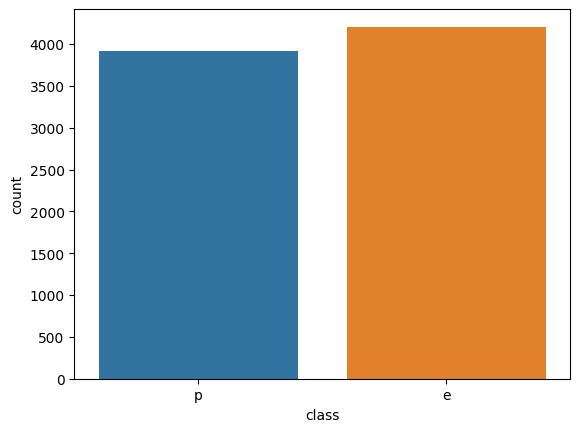

In [25]:
sns.countplot(df, x ='class', hue='class')

In [11]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [12]:
df.describe().transpose().reset_index()

,index,count,unique,top,freq
0,class,8124,2,e,4208
1,cap-shape,8124,6,x,3656
2,cap-surface,8124,4,y,3244
3,cap-color,8124,10,n,2284
4,bruises,8124,2,f,4748
5,odor,8124,9,n,3528
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
9,gill-color,8124,12,b,1728


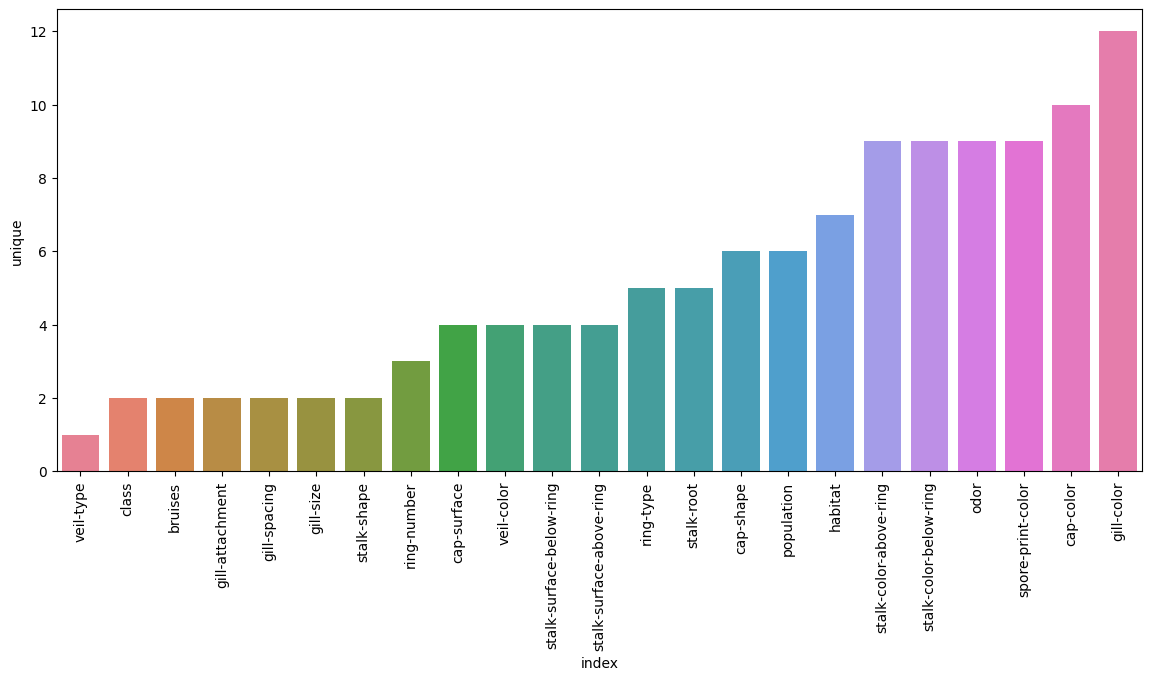

In [24]:
plt.figure(figsize=(14,6))
sns.barplot(df.describe().transpose().reset_index().sort_values('unique'), x='index', y='unique', hue='index')
plt.xticks(rotation=90);

## Train | Test Split and Modeling

In [26]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.97      0.82      0.89       630
           p       0.83      0.97      0.90       589

    accuracy                           0.89      1219
   macro avg       0.90      0.90      0.89      1219
weighted avg       0.90      0.89      0.89      1219



In [27]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
model.feature_importances_.argmax()

22

In [29]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

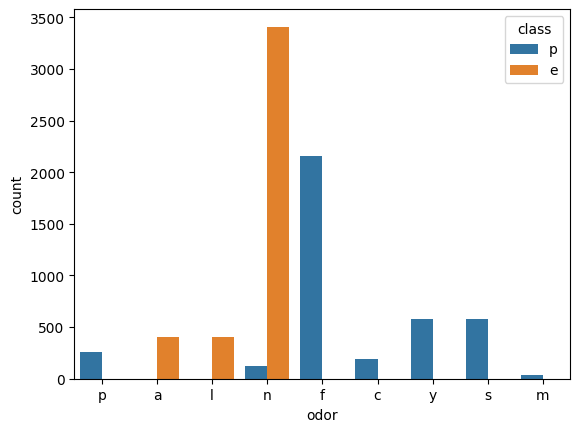

In [30]:
sns.countplot(df, x='odor', hue='class')

## Performance Analysis with multiple weak learners

In [31]:
len(X.columns)

95

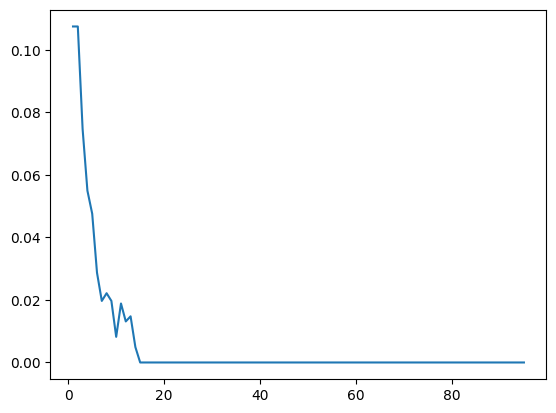

In [32]:
error_rates = []

for n in range(1,96):
  model = AdaBoostClassifier(n_estimators=n)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  err = 1 - accuracy_score(y_test, preds)

  error_rates.append(err)

plt.plot(range(1,96), error_rates)

In [33]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.01052632, 0.03157895, 0.03157895,
       0.01052632, 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.10526316, 0.06315789, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05263158, 0.01052632, 0.        , 0.        , 0.        ,
       0.07368421, 0.        , 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01052632, 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.01052632, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02105263, 0.01052632, 0.        , 0.     

In [35]:
feats = pd.DataFrame(model.feature_importances_ , index=X.columns, columns=['Importance'])
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [36]:
imp_feats = feats[feats['Importance']>0]
imp_feats

,Importance
cap-surface_g,0.010526
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.010526
odor_c,0.031579
odor_f,0.031579
odor_l,0.010526
odor_n,0.063158
odor_p,0.021053


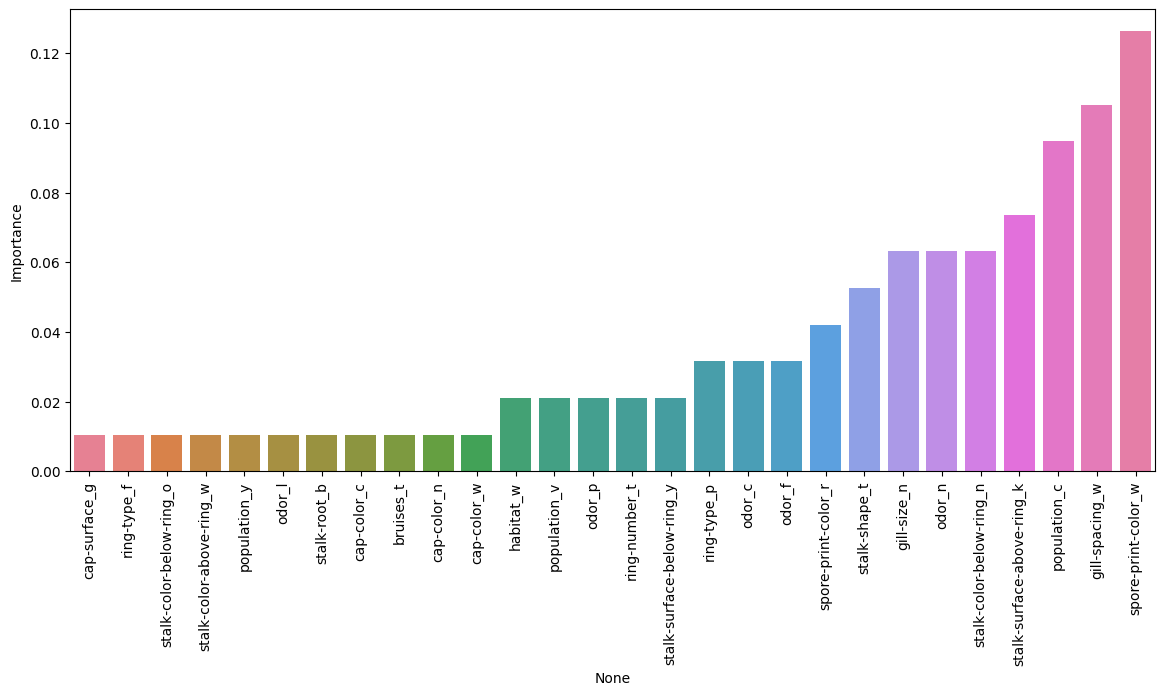

In [44]:
plt.figure(figsize=(14,6))

sns.barplot(imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance', hue=imp_feats.index, legend=False)
plt.xticks(rotation=90);

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       630
           p       1.00      1.00      1.00       589

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



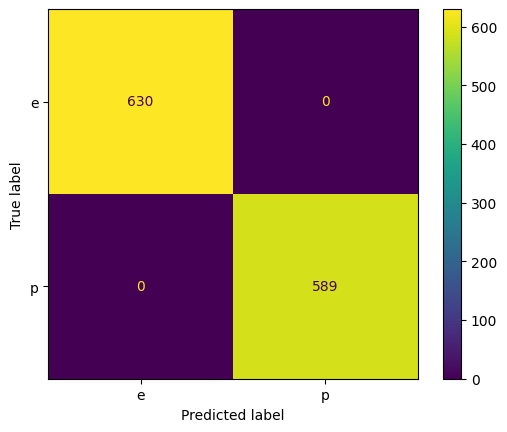

In [47]:
model = AdaBoostClassifier(n_estimators=19)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)